In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import talib
from time import time
from datetime import timedelta

# show float in two decimal form
plt.style.use('ggplot')
pd.set_option('display.float_format',lambda x : '%.2f' % x)

In [6]:
vic = pd.read_csv("../../data/vic_train.csv")
vic = vic.loc[1:].reset_index(drop=True)
vic['time'] = vic.time.astype('datetime64[ns]')
vic['month'] = vic.time.dt.strftime('%m')
vic['day'] = vic.time.dt.strftime('%d')
vic['weekday'] = vic.time.dt.strftime("%w")
#vic['year'] = vic.time.dt.strftime("%y")
vic


,time,spot_price,inter_gen,demand,period,month,day,weekday
0,2018-01-01 00:30:00,92.46,131.68,4398,2,01,01,1
1,2018-01-01 01:00:00,87.62,119.98,4238,3,01,01,1
2,2018-01-01 01:30:00,73.08,123.86,4112,4,01,01,1
3,2018-01-01 02:00:00,70.18,132.72,3956,5,01,01,1
4,2018-01-01 02:30:00,67.43,120.73,3833,6,01,01,1
...,...,...,...,...,...,...,...,...
52602,2020-12-31 21:30:00,35.05,295.14,4421,44,12,31,4
52603,2020-12-31 22:00:00,35.49,272.81,4353,45,12,31,4
52604,2020-12-31 22:30:00,48.25,221.45,4323,46,12,31,4
52605,2020-12-31 23:00:00,38.66,189.40,4330,47,12,31,4


In [31]:
x_train = vic.drop(columns = ['spot_price', 'time'])
y_train = vic['spot_price']
x_train

,inter_gen,demand,period,month,day,weekday
0,131.68,4398,2,01,01,1
1,119.98,4238,3,01,01,1
2,123.86,4112,4,01,01,1
3,132.72,3956,5,01,01,1
4,120.73,3833,6,01,01,1
...,...,...,...,...,...,...
52602,295.14,4421,44,12,31,4
52603,272.81,4353,45,12,31,4
52604,221.45,4323,46,12,31,4
52605,189.40,4330,47,12,31,4


In [32]:
vic_test = pd.read_csv("../../data/vic_test.csv")
vic_test['time'] = vic_test.time.astype('datetime64[ns]')
vic_test['month'] = vic_test.time.dt.strftime('%m')
vic_test['day'] = vic_test.time.dt.strftime('%d')
vic_test['weekday'] = vic_test.time.dt.strftime("%w")
y_test = vic_test['spot_price']
x_test = vic_test.drop(columns = ['spot_price', 'time'])
x_test


,inter_gen,demand,period,month,day,weekday
0,184.60,5410,1,07,01,4
1,175.53,5192,2,07,01,4
2,130.56,5016,3,07,01,4
3,120.55,4837,4,07,01,4
4,125.84,4661,5,07,01,4
...,...,...,...,...,...,...
2011,304.83,5911,44,08,11,3
2012,321.83,5695,45,08,11,3
2013,330.72,5450,46,08,11,3
2014,320.81,5269,47,08,11,3


In [33]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(n_estimators=100, random_state=1)
rfc_clf.fit(x_train, y_train.astype('int'))

RandomForestClassifier(random_state=1)

In [34]:
print("RandomForestClassifier accuracy: ")
rfc_result = rfc_clf.predict(x_test)
rfc_residuals = y_test - rfc_result
print('Mean Absolute Percent Error:', round(np.mean(abs(rfc_residuals/y_test)), 4))
print('Root Mean Squared Error:', np.sqrt(np.mean(rfc_residuals**2)))

RandomForestClassifier accuracy: 
Mean Absolute Percent Error: 3.2128
Root Mean Squared Error: 92.71377874751327


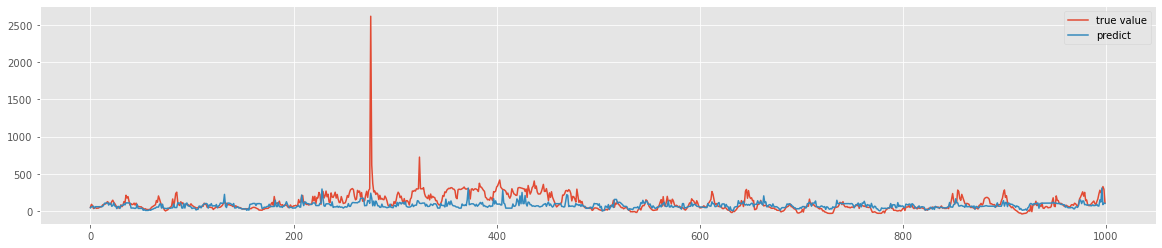

In [35]:
plt.figure(figsize=(20, 4))
plt.plot(y_test[:1000], label='true value')
plt.plot(rfc_result[:1000], label='predict')
plt.legend()
plt.show()

In [36]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
svc_clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svc_clf.fit(x_train, y_train.astype('int'))

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [37]:
print("SVC accuracy: ")
svc_result = svc_clf.predict(x_test)
svc_residuals = y_test - svc_result
print('Mean Absolute Percent Error:', round(np.mean(abs(svc_residuals/y_test)), 4))
print('Root Mean Squared Error:', np.sqrt(np.mean(svc_residuals**2)))

SVC accuracy: 
Mean Absolute Percent Error: 2.9308
Root Mean Squared Error: 93.23012122575965


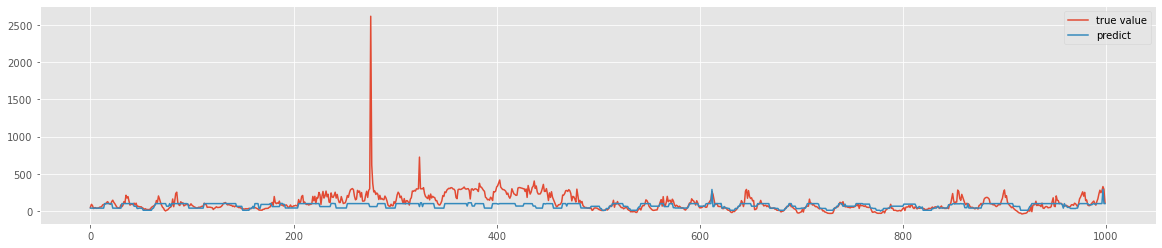

In [38]:
plt.figure(figsize=(20, 4))
plt.plot(y_test[:1000], label='true value')
plt.plot(svc_result[:1000], label='predict')
plt.legend()
plt.show()

In [55]:
data = pd.read_csv("../../data/vic_train.csv")
data = data.loc[:100]
data = data.drop(columns = ['inter_gen', 'demand', 'period' ])
data.set_index('time', inplace=True)
data

,spot_price
time,
2018-01-01 00:00:00,90.43
2018-01-01 00:30:00,92.46
2018-01-01 01:00:00,87.62
2018-01-01 01:30:00,73.08
2018-01-01 02:00:00,70.18
...,...
2018-01-03 00:00:00,66.02
2018-01-03 00:30:00,59.33
2018-01-03 01:00:00,55.01


In [56]:
import pmdarima as pm
model = pm.auto_arima(data, start_p=1,start_q=1,
test='adf', max_p=5,max_q=5,m=1,d=0,seasonal=True,
start_P=0,start_Q=0,D=0,
trace=True,error_action='ignore', 
suppress_warnings=True,
stepwise=True,with_intercept=False)



Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=599.816, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1146.600, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=601.175, Time=0.04 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=601.694, Time=0.05 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.03 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.13 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=595.454, Time=0.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=663.195, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=593.456, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=729.466, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=595.453, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=597.003, Time=0.13 sec



                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  101
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -293.728
Date:                Sat, 18 Sep 2021   AIC                            593.456
Time:                        02:36:25   BIC                            601.301
Sample:                             0   HQIC                           596.632
                                - 101                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.2988      3.175      1.984      0.047       0.075      12.522
ar.L1          0.9091      0.043     21.221      0.000       0.825       0.993
sigma2        19.3207      2.763      6.992      0.0

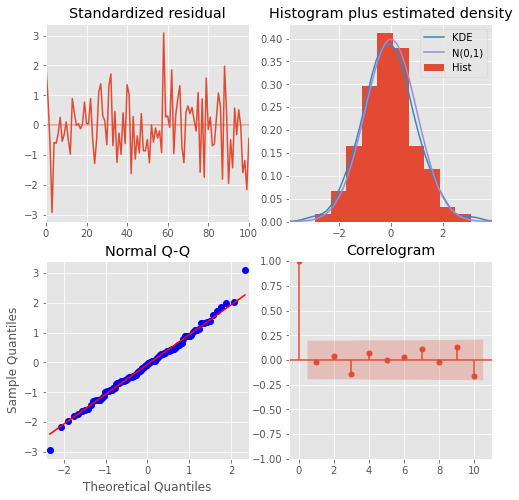

In [57]:
print(model.summary())
model.plot_diagnostics(figsize=(8,8))
plt.show()

